In [ ]:
#overall performance metrics eval ISNetDANN

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [ ]:
#================== Overall Results ISNetDANN - No Finding Sex =================

In [2]:
base_path = Path('/home/lchanch/models/ISNetDANN/eval/independet_runs')

attributes = ['sex']

df_test_results = {}
df_lr_results = {}

for attr in attributes:
    test_file = base_path / f'test_results_all_{attr}.csv'
    lr_file = base_path / f'lr_cond_avg_results_all_{attr}.csv'

    df_test_results[attr] = pd.read_csv(test_file)
    df_lr_results[attr] = pd.read_csv(lr_file)


In [3]:
df_test_results_sex=df_test_results['sex']

In [6]:
def add_classification_metrics(df):
    """
    Adds Recall, Specificity, Precision and F1-score
    computed fromn TP, TN, FP, FN del set de test (_te).
    """
    df = df.copy()

    df['precision'] = df['TP_opt_te'] / (df['TP_opt_te'] + df['FP_opt_te'])
    df['recall'] = df['TP_opt_te'] / (df['TP_opt_te'] + df['FN_opt_te'])
    df['f1_score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])
    df['specificity'] = df['TN_opt_te'] / (df['TN_opt_te'] + df['FP_opt_te'])
   
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

In [7]:
df_test_results_sex=add_classification_metrics(df_test_results_sex)
df_test_results_sex.head(1)

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1,precision,recall,f1_score,specificity
0,8814630466f9f559b569632bd4ed860c,5,8,No Finding,sex,0.833424,0.764434,0.290428,0.180703,0.819297,...,0.170328,0.664866,0.829672,0.29773,0.317567,0.150793,0.654786,0.709572,0.681079,0.819297


In [8]:
df_best_models_ISNetDANN=df_test_results_sex.copy()
df_best_models_ISNetDANN.insert(0, "model", "ISNetDANN")
df_best_models_ISNetDANN=df_best_models_ISNetDANN[['store_name','seed','hparams_seed','model','task','attr','AUROC_te','balanced_acc_opt_te', 'brier_te', 'precision','recall','f1_score', 'FNR_opt_te', 'FPR_opt_te']]
df_best_models_ISNetDANN

,store_name,seed,hparams_seed,model,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
0,8814630466f9f559b569632bd4ed860c,5,8,ISNetDANN,No Finding,sex,0.833424,0.764434,0.150726,0.654786,0.709572,0.681079,0.290428,0.180703
1,8720e53a92609c0ef902d64983f230f7,3,8,ISNetDANN,No Finding,sex,0.825892,0.758353,0.162082,0.592983,0.772992,0.671127,0.227008,0.256287
3,a21c19a8a4043056348dd4fce57d7815,1,8,ISNetDANN,No Finding,sex,0.827386,0.757549,0.160166,0.576295,0.798775,0.669537,0.201225,0.283676
4,1a4f01c3ecaf6cd2ec608cce5d8cd1a3,4,8,ISNetDANN,No Finding,sex,0.829405,0.764496,0.152893,0.633404,0.734268,0.680117,0.265732,0.205277
5,dac6515f78e7035a76c2bd534bc1cd63,0,8,ISNetDANN,No Finding,sex,0.833715,0.768365,0.154422,0.635059,0.742962,0.684786,0.257038,0.206232
6,e71e3c622a942657993e10cf0b5e652b,2,8,ISNetDANN,No Finding,sex,0.832509,0.765603,0.151792,0.626441,0.746123,0.681064,0.253877,0.214916


In [12]:
#95% CI boostrap
def bootstrap_ci(values, n_bootstrap=1000, alpha=0.05):
    values = np.asarray(values, dtype=float)
    boot_means = []

    for _ in range(n_bootstrap):# Bootstrap procedure: resample the data with replacement n_bootstrap times
        sample = np.random.choice(values, size=len(values), replace=True) # Draw a bootstrap sample of the same size as the original data
        boot_means.append(sample.mean()) # Compute the statistic of interest (mean) for the bootstrap sample

    # Compute the lower bound of the (1 - alpha) confidence interval using the percentile method
    ci_low = np.percentile(boot_means, 100 * alpha / 2) 
    ci_high = np.percentile(boot_means, 100 * (1 - alpha / 2))

    return ci_low, ci_high

In [14]:
metrics = [
    'AUROC_te',
    'balanced_acc_opt_te',
    'brier_te',
    'precision',
    'recall',
    'f1_score',
    'FNR_opt_te',
    'FPR_opt_te'
]

rows = []

for metric in metrics:

    values = df_best_models_ISNetDANN[metric]

    mean = values.mean()
    std = values.std(ddof=1)

    ci_low, ci_high = bootstrap_ci(values)

    rows.append({
        'model': 'ISNetDANN',
        'task': 'No finding',
        'attr': 'sex',
        'metric': metric,
        'mean': mean,
        'std': std,
        'ci95_low': ci_low,
        'ci95_high': ci_high,
        'ci95_range': ci_high - ci_low
    })

df_overall_eval_ISNetDANN = pd.DataFrame(rows)
df_overall_eval_ISNetDANN


,model,task,attr,metric,mean,std,ci95_low,ci95_high,ci95_range
0,ISNetDANN,No finding,sex,AUROC_te,0.830389,0.003316,0.828231,0.832755,0.004524
1,ISNetDANN,No finding,sex,balanced_acc_opt_te,0.763133,0.004267,0.760110,0.766144,0.006034
2,ISNetDANN,No finding,sex,brier_te,0.155347,0.004679,0.152057,0.158770,0.006714
3,ISNetDANN,No finding,sex,precision,0.619828,0.029318,0.598568,0.638777,0.040209
4,ISNetDANN,No finding,sex,recall,0.750782,0.031146,0.729814,0.774951,0.045137
5,ISNetDANN,No finding,sex,f1_score,0.677952,0.006136,0.673329,0.682310,0.008981
6,ISNetDANN,No finding,sex,FNR_opt_te,0.249218,0.031146,0.223600,0.271626,0.048026
7,ISNetDANN,No finding,sex,FPR_opt_te,0.224515,0.038014,0.199170,0.253137,0.053968


In [ ]:
#================== Overall Results ISNetDANN - No Finding Sex =================

In [ ]:
#================== Overall Results ERM - No Finding Sex =================

In [35]:
base_path = Path('/home/lchanch/models/ERM/eval/independent_runs')

attributes = ['sex']

df_test_results_erm = {}

for attr in attributes:
    test_file = base_path / f'test_results_all_{attr}.csv'
    df_test_results_erm[attr] = pd.read_csv(test_file)

In [36]:
df_test_results_erm['sex'].head()

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FN_opt_attr_1,TP_opt_attr_1,FP_opt_attr_1,FNR_opt_attr_1,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1
0,7cc919e21a4002c14ecfa9b6bce64ee8,2,6,Cardiomegaly,sex,0.810292,0.733978,0.245460,0.286584,0.713416,...,1188.0,3235.0,5652.0,0.268596,0.280733,0.731404,0.719267,0.180119,0.361907,0.120896
1,c18c180d10daeaa9d6be097f7b6c8b0a,6,6,Cardiomegaly,sex,0.802491,0.717786,0.330873,0.233555,0.766445,...,1498.0,2925.0,4807.0,0.338684,0.238762,0.661316,0.761238,0.180119,0.314872,0.124477
2,c19d80636e9838501fcc5c7c2758f08f,9,6,Cardiomegaly,sex,0.807139,0.732740,0.231986,0.302534,0.697466,...,1110.0,3313.0,5941.0,0.250961,0.295088,0.749039,0.704912,0.180119,0.376853,0.121439
3,2c7132e5752795faf3b4b463c78a22b1,8,6,Cardiomegaly,sex,0.807404,0.727401,0.286819,0.258378,0.741622,...,1334.0,3089.0,5240.0,0.301605,0.260269,0.698395,0.739731,0.180119,0.339184,0.121799
4,cd5f3877474a7f2545cabdb76fa12221,4,6,Cardiomegaly,sex,0.806779,0.727185,0.293263,0.252368,0.747632,...,1376.0,3047.0,5081.0,0.311101,0.252372,0.688899,0.747628,0.180119,0.330999,0.121887


In [37]:
df_test_results_sex_erm=df_test_results_erm['sex']

In [38]:
df_test_results_sex_erm=df_test_results_sex_erm[df_test_results_sex_erm['seed'].between(0, 5)]
df_test_results_sex_erm['seed'].unique()

array([2, 4, 0, 1, 5, 3])

In [39]:
df_test_results_sex_erm = df_test_results_sex_erm.loc[
    df_test_results_sex_erm['task'] == 'No Finding'
]
df_test_results_sex_erm

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FN_opt_attr_1,TP_opt_attr_1,FP_opt_attr_1,FNR_opt_attr_1,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1
10,3350f06b5e1bb6f627302ae407838e35,4,1,No Finding,sex,0.847130,0.774699,0.216788,0.233814,0.766186,...,2106.0,6411.0,3534.0,0.247270,0.220338,0.752730,0.779662,0.34684,0.404993,0.153081
11,1a1e111ccdd14e61a1884db47b8d0117,1,1,No Finding,sex,0.846708,0.773465,0.221857,0.231213,0.768787,...,2117.0,6400.0,3539.0,0.248562,0.220650,0.751438,0.779350,0.34684,0.404748,0.153206
16,8567bca8c4876916928b7465a52cdeae,0,1,No Finding,sex,0.849310,0.777068,0.216845,0.229018,0.770982,...,2103.0,6414.0,3448.0,0.246918,0.214976,0.753082,0.785024,0.34684,0.401613,0.151134
17,380016e06e9472175f3b7c854498835c,2,1,No Finding,sex,0.847445,0.771963,0.168222,0.287852,0.712148,...,1664.0,6853.0,4338.0,0.195374,0.270466,0.804626,0.729534,0.34684,0.455734,0.156376
18,f5b0c222bab261c9ee0dd37b13deae06,5,1,No Finding,sex,0.845053,0.765099,0.293640,0.176163,0.823837,...,2843.0,5674.0,2606.0,0.333803,0.162479,0.666197,0.837521,0.34684,0.337188,0.153962
19,2cb69914d57bdca16c8ae3e2d3ab2b9c,3,1,No Finding,sex,0.845298,0.770931,0.183086,0.275052,0.724948,...,1836.0,6681.0,4189.0,0.215569,0.261176,0.784431,0.738824,0.34684,0.442662,0.158127


In [40]:
df_test_results_sex_erm.columns

Index(['store_name', 'seed', 'hparams_seed', 'task', 'attr', 'AUROC_te',
       'balanced_acc_opt_te', 'FNR_opt_te', 'FPR_opt_te', 'TNR_opt_te',
       'TPR_opt_te', 'TP_opt_te', 'TN_opt_te', 'FP_opt_te', 'FN_opt_te',
       'brier_te', 'AUROC_va', 'balanced_acc_opt_va', 'FNR_opt_va',
       'FPR_opt_va', 'TNR_opt_va', 'TPR_opt_va', 'TP_opt_va', 'TN_opt_va',
       'FP_opt_va', 'FN_opt_va', 'brier_va', 'fair_gap', 'fair_metric',
       'fair_gap_desc', 'AUROC_attr_0', 'balanced_acc_attr_0', 'TN_opt_attr_0',
       'FN_opt_attr_0', 'TP_opt_attr_0', 'FP_opt_attr_0', 'FNR_opt_attr_0',
       'FPR_opt_attr_0', 'TPR_opt_attr_0', 'TNR_opt_attr_0',
       'prevalence_opt_attr_0', 'pred_prevalence_opt_attr_0', 'brier_attr_0',
       'AUROC_attr_1', 'balanced_acc_attr_1', 'TN_opt_attr_1', 'FN_opt_attr_1',
       'TP_opt_attr_1', 'FP_opt_attr_1', 'FNR_opt_attr_1', 'FPR_opt_attr_1',
       'TPR_opt_attr_1', 'TNR_opt_attr_1', 'prevalence_opt_attr_1',
       'pred_prevalence_opt_attr_1', 'brier_att

In [42]:
df_test_results_sex_erm=add_classification_metrics(df_test_results_sex_erm)
df_test_results_sex_erm.head(1)

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1,precision,recall,f1_score,specificity
10,3350f06b5e1bb6f627302ae407838e35,4,1,No Finding,sex,0.84713,0.774699,0.216788,0.233814,0.766186,...,0.220338,0.75273,0.779662,0.34684,0.404993,0.153081,0.662589,0.783212,0.717869,0.766186


In [43]:
df_best_models_ERM=df_test_results_sex_erm.copy()
df_best_models_ERM.insert(0, "model", "ERM")
df_best_models_ERM=df_best_models_ERM[['store_name','seed','hparams_seed','model','task','attr','AUROC_te','balanced_acc_opt_te', 'brier_te', 'precision','recall','f1_score', 'FNR_opt_te', 'FPR_opt_te']]
df_best_models_ERM

,store_name,seed,hparams_seed,model,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
10,3350f06b5e1bb6f627302ae407838e35,4,1,ERM,No Finding,sex,0.847130,0.774699,0.152010,0.662589,0.783212,0.717869,0.216788,0.233814
11,1a1e111ccdd14e61a1884db47b8d0117,1,1,ERM,No Finding,sex,0.846708,0.773465,0.152233,0.663637,0.778143,0.716343,0.221857,0.231213
16,8567bca8c4876916928b7465a52cdeae,0,1,ERM,No Finding,sex,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018
17,380016e06e9472175f3b7c854498835c,2,1,ERM,No Finding,sex,0.847445,0.771963,0.155870,0.628805,0.831778,0.716188,0.168222,0.287852
18,f5b0c222bab261c9ee0dd37b13deae06,5,1,ERM,No Finding,sex,0.845053,0.765099,0.152443,0.701551,0.706360,0.703947,0.293640,0.176163
19,2cb69914d57bdca16c8ae3e2d3ab2b9c,3,1,ERM,No Finding,sex,0.845298,0.770931,0.156326,0.635191,0.816914,0.714682,0.183086,0.275052


In [44]:
metrics = [
    'AUROC_te',
    'balanced_acc_opt_te',
    'brier_te',
    'precision',
    'recall',
    'f1_score',
    'FNR_opt_te',
    'FPR_opt_te'
]

rows = []

for metric in metrics:

    values = df_best_models_ERM[metric]

    mean = values.mean()
    std = values.std(ddof=1)

    ci_low, ci_high = bootstrap_ci(values)

    rows.append({
        'model': 'ERM',
        'task': 'No finding',
        'attr': 'sex',
        'metric': metric,
        'mean': mean,
        'std': std,
        'ci95_low': ci_low,
        'ci95_high': ci_high,
        'ci95_range': ci_high - ci_low
    })

df_overall_eval_ERM = pd.DataFrame(rows)
df_overall_eval_ERM


,model,task,attr,metric,mean,std,ci95_low,ci95_high,ci95_range
0,ERM,No finding,sex,AUROC_te,0.846824,0.001558,0.845727,0.847967,0.002241
1,ERM,No finding,sex,balanced_acc_opt_te,0.772204,0.004090,0.769064,0.774861,0.005797
2,ERM,No finding,sex,brier_te,0.153152,0.002443,0.151425,0.154920,0.003495
3,ERM,No finding,sex,precision,0.659827,0.026025,0.642365,0.678057,0.035692
4,ERM,No finding,sex,recall,0.783260,0.043420,0.749558,0.811443,0.061885
5,ERM,No finding,sex,f1_score,0.714928,0.005733,0.710346,0.718388,0.008042
6,ERM,No finding,sex,FNR_opt_te,0.216740,0.043420,0.187742,0.251385,0.063642
7,ERM,No finding,sex,FPR_opt_te,0.238852,0.039552,0.210985,0.264974,0.053989


In [ ]:
#================== Overall Results ERM - No Finding Sex =================

In [ ]:
#====================Overall performance comparison======================

In [45]:
df_overall_per_comparison = pd.concat([df_overall_eval_ERM, df_overall_eval_ISNetDANN], axis=0)
df_overall_per_comparison 

,model,task,attr,metric,mean,std,ci95_low,ci95_high,ci95_range
0,ERM,No finding,sex,AUROC_te,0.846824,0.001558,0.845727,0.847967,0.002241
1,ERM,No finding,sex,balanced_acc_opt_te,0.772204,0.004090,0.769064,0.774861,0.005797
2,ERM,No finding,sex,brier_te,0.153152,0.002443,0.151425,0.154920,0.003495
3,ERM,No finding,sex,precision,0.659827,0.026025,0.642365,0.678057,0.035692
4,ERM,No finding,sex,recall,0.783260,0.043420,0.749558,0.811443,0.061885
5,ERM,No finding,sex,f1_score,0.714928,0.005733,0.710346,0.718388,0.008042
6,ERM,No finding,sex,FNR_opt_te,0.216740,0.043420,0.187742,0.251385,0.063642
7,ERM,No finding,sex,FPR_opt_te,0.238852,0.039552,0.210985,0.264974,0.053989
0,ISNetDANN,No finding,sex,AUROC_te,0.830389,0.003316,0.828231,0.832755,0.004524
1,ISNetDANN,No finding,sex,balanced_acc_opt_te,0.763133,0.004267,0.760110,0.766144,0.006034


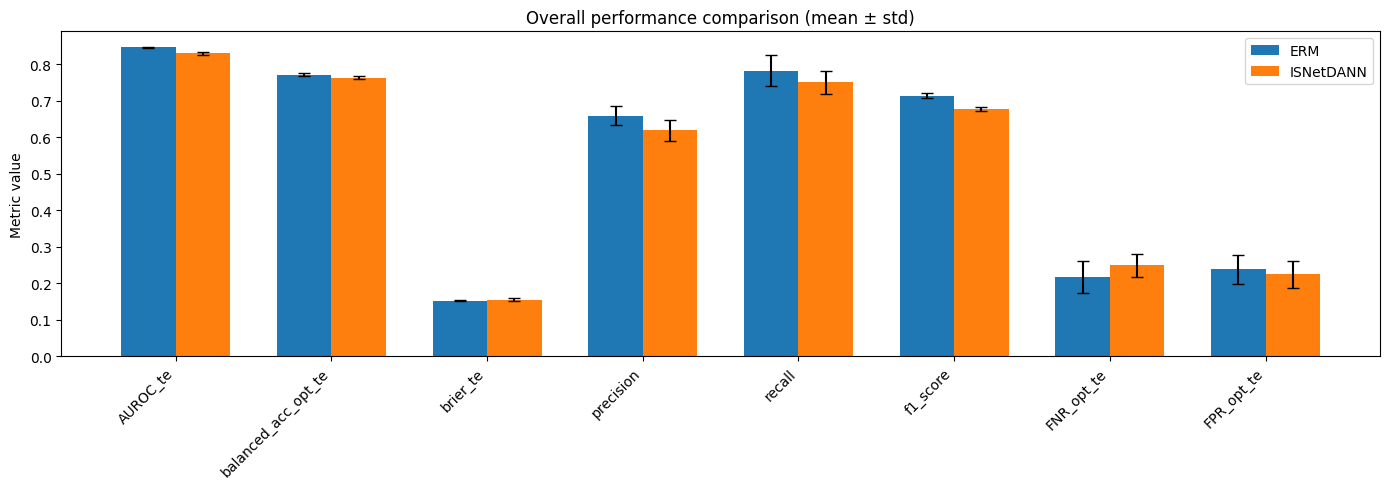

In [50]:
import numpy as np
import matplotlib.pyplot as plt

metrics = [
    "AUROC_te",
    "balanced_acc_opt_te",
    "brier_te",
    "precision",
    "recall",
    "f1_score",
    "FNR_opt_te",
    "FPR_opt_te"
]

models = df_overall_per_comparison["model"].unique()
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(14, 5))

for i, model in enumerate(models):
    df_m = df_overall_per_comparison[
        df_overall_per_comparison["model"] == model
    ].set_index("metric").loc[metrics]

    means = df_m["mean"].values
    stds = df_m["std"].values

    plt.bar(
        x + (i - len(models)/2) * width + width/2,
        means,
        width,
        yerr=stds,
        capsize=4,
        label=model
    )

plt.xticks(x, metrics, rotation=45, ha="right")
plt.ylabel("Metric value")
plt.title("Overall performance comparison (mean ± std)")
plt.legend()
plt.tight_layout()

plt.show()


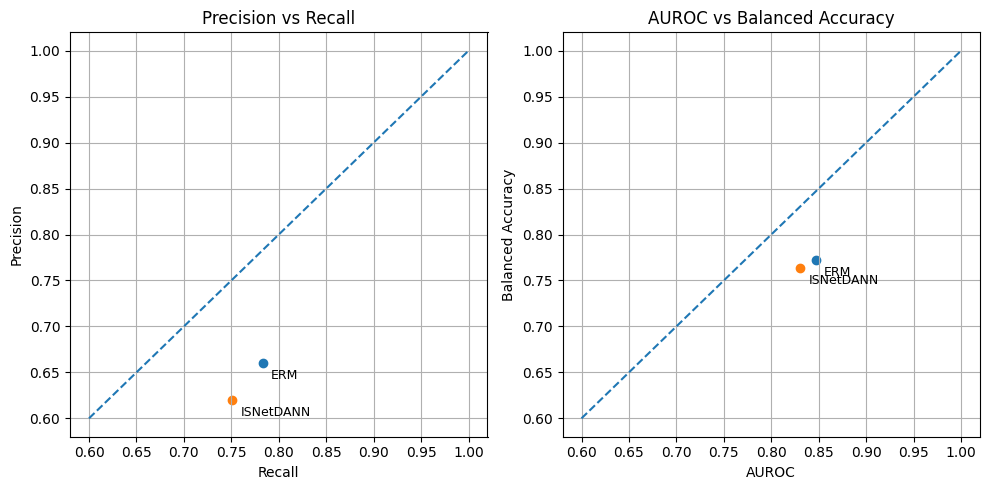

In [60]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


ax = axes[0]

for model in df_overall_per_comparison["model"].unique():
    df_m = df_overall_per_comparison[
        df_overall_per_comparison["model"] == model
    ].set_index("metric")

    recall = df_m.loc["recall", "mean"]
    precision = df_m.loc["precision", "mean"]

    ax.scatter(recall, precision)
    ax.annotate(
        model,
        (recall, precision),
        textcoords="offset points",
        xytext=(6, -4),   
        ha="left",
        va="top",
        fontsize=9
    )

x = [0.6, 1.0]
ax.plot(x, x, linestyle="--")

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision vs Recall")
ax.grid(True)


ax = axes[1]

for model in df_overall_per_comparison["model"].unique():
    df_m = df_overall_per_comparison[
        df_overall_per_comparison["model"] == model
    ].set_index("metric")

    auroc = df_m.loc["AUROC_te", "mean"]
    bal_acc = df_m.loc["balanced_acc_opt_te", "mean"]

    ax.scatter(auroc, bal_acc)
    ax.annotate(
        model,
        (auroc, bal_acc),
        textcoords="offset points",
        xytext=(6, -4),
        ha="left",
        va="top",
        fontsize=9
    )

x = [0.6, 1.0]
ax.plot(x, x, linestyle="--")

ax.set_xlabel("AUROC")
ax.set_ylabel("Balanced Accuracy")
ax.set_title("AUROC vs Balanced Accuracy")
ax.grid(True)

plt.tight_layout()
plt.show()
